In [1]:
#Import packages

import matplotlib.pyplot as plt
import random
import numpy as np
load('NumericalSemigroup.sage')


true
Successfully loaded Singular


In [2]:
#Test NumericalSemigroup Package
McNuggets = NumericalSemigroup([6,9,20])
print(McNuggets.FrobeniusNumber())
print(McNuggets.LengthSet(400))
print(McNuggets.DeltaSet(400))
print(McNuggets.OmegaPrimality(400))
print(McNuggets.CatenaryDegree(400))
load('KunzPoset.sage')
load('PlotKunzPoset.sage')
PlotKunzPoset([6,9,20])
PlotKunzPoset([5,6,9])
McNuggets.KunzCoordinates()


43
[20, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]
{1, 4}
70
7


[8, 3, 1, 6, 4]

In [3]:
NumericalSemigroup([6,9,20]).gens

[6, 9, 20]

In [4]:
# Estimate function in Expected Frobenious numbers
def estimate(generators, n):
    return ((factorial(n - 1) * prod(generators)) ^ (1 / (n - 1))).n()

# Generates random sample using Erdös-Rényi model 
def generate_sample(M, p, sample_size):
    semigroups = []
    for j in range(sample_size):
        generators = []
        for i in range(M):
            if random.random() < p:
                generators.append(i)
        if gcd(generators) != 1:
            continue
        semigroups.append(NumericalSemigroup(generators))
    return semigroups
             
def frobenius_numbers(semigroups):
    return [semigroup.FrobeniusNumber() for semigroup in semigroups]

def embedding_dims(semigroups):
    return [len(semigroup.gens) for semigroup in semigroups]



In [5]:
semigroups1 = generate_sample(25000, 0.01, 1000)

9.708


(array([157., 311., 261., 138.,  80.,  40.,   6.,   4.,   1.,   2.]),
 array([ 1. ,  4.7,  8.4, 12.1, 15.8, 19.5, 23.2, 26.9, 30.6, 34.3, 38. ]),
 <BarContainer object of 10 artists>)

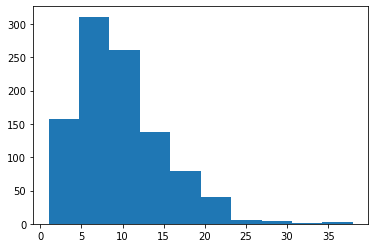

In [6]:
data = embedding_dims(semigroups1)
print(np.mean(data))
# histogram of data
plt.hist(data)

1558.848


(array([141., 232., 248., 153., 116.,  69.,  25.,   6.,   7.,   3.]),
 array([-1.000e+00,  5.650e+02,  1.131e+03,  1.697e+03,  2.263e+03,
         2.829e+03,  3.395e+03,  3.961e+03,  4.527e+03,  5.093e+03,
         5.659e+03]),
 <BarContainer object of 10 artists>)

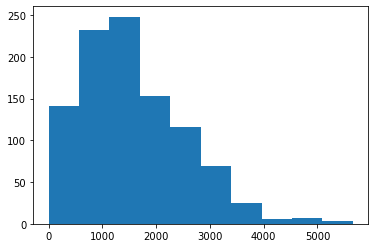

In [7]:
data = frobenius_numbers(semigroups1)
print(np.mean(data))
plt.hist(data)

In [8]:

lower_bound_e = lambda p : ((6 - 8*p + 3*p^2)/(2 - 2*p^2 + p^3))
upper_bound_e = lambda p : ((2 - p^2)/(p))

lower_bound_g = lambda p : ((6 - 14*p + 11*p^2 + 3*p^2)/(2*p - 2*p^3 - p^4))
upper_bound_g = lambda p : ((1 - p)*(2 - p^2)/(p^2))

#Example
p = np.array([0.01])
print(lower_bound_g(p[0]), 2*upper_bound_g(p[0]))

293.0994564953778 39598.02


In [9]:
upper = -0.6
lower = -3
n_samples = 15
x = np.logspace(upper, lower, n_samples)
samples = []
M = 25000
n = 1000
for i in range(n_samples):
    samples.append(generate_sample(M, x[i], n))
    print(i)

KeyboardInterrupt: Ctrl-c pressed while running Gap

IOStream.flush timed out


In [ ]:
data_frobenius = np.array([np.mean(frobenius_numbers(sample)) for sample in samples])
data_embedding = np.array([np.mean(embedding_dims(sample)) for sample in samples])

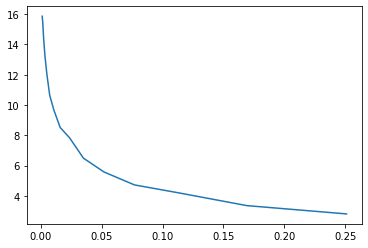

In [ ]:
plt.plot(x, data_embedding)

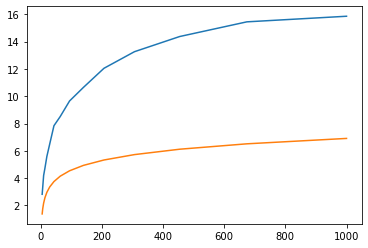

In [ ]:
plt.plot(1/x, data_embedding)
plt.plot(1/x, np.log(1/x))

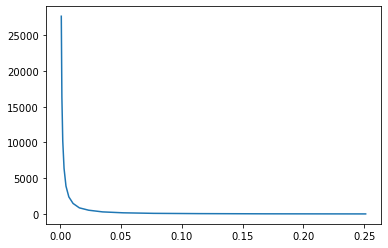

In [ ]:
plt.plot(x, data_frobenius)

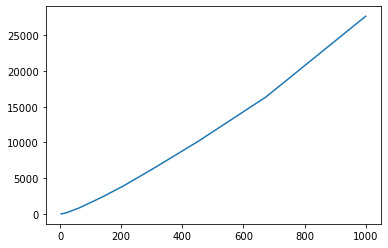

In [ ]:
plt.plot(1/x, data_frobenius)

In [ ]:
import pandas as pd
table = pd.DataFrame()
table['p'] = x
table['1/p'] = 1/x
table['E(e(S)) lower bound'] = [lower_bound_e(p) for p in x]
table['E(e(S))'] = data_embedding
table['E(e(S)) upper bound'] = [2*upper_bound_e(p) for p in x]
table['(1/p) / E(e(S))'] = (1/x)/data_embedding
table['E(F(S)) lower bound'] = [lower_bound_g(p) for p in x]
table['E(F(s))'] = data_frobenius
table['E(F(S)) upper bound'] = [2*upper_bound_g(p) for p in x]
table['(1/p) / E(F(s))'] = (1/x)/data_frobenius
table

,p,1/p,E(e(S)) lower bound,E(e(S)),E(e(S)) upper bound,(1/p) / E(e(S)),E(F(S)) lower bound,E(F(s)),E(F(S)) upper bound,(1/p) / E(F(s))
0,0.251189,3.981072,2.211924,2.818,15.421910,1.412729,7.213866,13.647,4.597382e+01,0.291718
1,0.169267,5.907838,2.429631,3.365,23.292818,1.755672,12.290315,27.586,1.143174e+02,0.214161
2,0.114062,8.767124,2.595103,4.194,34.840371,2.090397,20.380081,54.693,2.706095e+02,0.160297
3,0.076862,13.010252,2.716846,4.730,51.887284,2.750582,32.769833,92.879,6.231794e+02,0.140077
4,0.051795,19.306977,2.804173,5.585,77.124320,3.456934,51.425026,168.715,1.411913e+03,0.114435
5,0.034903,28.651203,2.865647,6.496,114.535006,4.410592,79.296209,297.770,3.167031e+03,0.096219
6,0.023520,42.517863,2.908342,7.838,170.024413,5.424581,120.785826,531.230,7.059050e+03,0.080037
7,0.015849,63.095734,2.937713,8.511,252.351240,7.413434,182.444337,861.281,1.566994e+04,0.073258
8,0.010680,93.632921,2.957787,9.650,374.510324,9.702893,274.004943,1476.265,3.469199e+04,0.063426
9,0.007197,138.949549,2.971444,10.642,555.783804,13.056714,409.920334,2394.564,7.667013e+04,0.058027


In [13]:
# Generate samples 
upper = 4
lower = 1000
n_samples = 15
x = 1/np.linspace(upper, lower, n_samples)
samples = []
M = 100000
n = 1000
for i in range(n_samples):
    print(i)
    samples.append(generate_sample(M, x[i], n))

data_frobenius = np.array([np.mean(frobenius_numbers(sample)) for sample in samples])
data_embedding = np.array([np.mean(embedding_dims(sample)) for sample in samples])



0


IOStream.flush timed out


1
2
3
4
5
6
7
8
9
10
11
12
13
14


NameError: name 'pd' is not defined

In [96]:
samples

[[Numerical Semigroup generated by [2, 9],
  Numerical Semigroup generated by [18, 21, 22, 30, 31, 33, 34, 45, 47, 50, 59],
  Numerical Semigroup generated by [4, 9, 11],
  Numerical Semigroup generated by [9, 10, 15, 17],
  Numerical Semigroup generated by [3, 13],
  Numerical Semigroup generated by [6, 9, 23, 34],
  Numerical Semigroup generated by [9, 10, 12, 15, 26],
  Numerical Semigroup generated by [2, 11],
  Numerical Semigroup generated by [6, 7, 11],
  Numerical Semigroup generated by [4, 11, 14, 21],
  Numerical Semigroup generated by [1],
  Numerical Semigroup generated by [1],
  Numerical Semigroup generated by [7, 10, 22, 23, 25, 26],
  Numerical Semigroup generated by [2, 13],
  Numerical Semigroup generated by [1],
  Numerical Semigroup generated by [6, 8, 17, 27],
  Numerical Semigroup generated by [10, 15, 22, 31, 36],
  Numerical Semigroup generated by [4, 13, 15, 22],
  Numerical Semigroup generated by [4, 5],
  Numerical Semigroup generated by [1],
  Numerical Semi

In [1]:
import pickle
# Save frobenius numbers to pkl
frobenius_numbers = [frobenius_numbers(sample) for sample in samples]
with open('frobenius_numbers.pkl', 'wb') as f:
    pickle.dump(frobenius_numbers, f)

embedding_dims = [embedding_dims(sample) for sample in samples]
with open('embedding_dims.pkl', 'wb') as f:
    pickle.dump(embedding_dims, f)



# load frobenius numbers
with open('frobenius_numbers.pkl', 'rb') as f:
    frobenius_numbers = pickle.load(f)



NameError: name 'samples' is not defined

In [1]:
import pickle
import numpy as np

with open('data_frobenius.pkl', 'rb') as f:
    data_frobenius = pickle.load(f)

with open('data_embedding.pkl', 'rb') as f:
    data_embedding = pickle.load(f)

In [2]:
upper = 4
lower = 1000
n_samples = 15
x = 1/np.linspace(upper, lower, n_samples)


lower_bound_e = lambda p : ((6 - 8*p + 3*(p**2))/(2 - 2*(p**2) + p**3))
upper_bound_e = lambda p : ((2 - p**2)/(p))

lower_bound_g = lambda p : ((6 - 14*p + 11*(p**2) + 3*(p**2))/(2*p - 2*(p**3) - p**4))
upper_bound_g = lambda p : ((1 - p)*(2 - p**2)/(p**2))

In [3]:
data_frobenius

array([1.3962000e+01, 1.0888240e+03, 2.4832610e+03, 4.1749380e+03,
       5.8592910e+03, 7.7941750e+03, 9.5945590e+03, 1.1533377e+04,
       1.3765727e+04, 1.6239194e+04, 1.7769338e+04, 1.9806191e+04,
       2.2157778e+04, 2.5079102e+04, 2.6637455e+04])

In [4]:
# Table
import pandas as pd
table = pd.DataFrame()
table['p'] = x
table['1/p'] = 1/x
table['E(e(S)) lower bound'] = [lower_bound_e(p) for p in x]
table['E(e(S))'] = data_embedding
table['E(e(S)) upper bound'] = [2*upper_bound_e(p) for p in x]
table['(1/p) / E(e(S))'] = (1/x)/data_embedding
table['(1/p) / E(F(s))'] = (1/x)/data_frobenius
table

,p,1/p,E(e(S)) lower bound,E(e(S)),E(e(S)) upper bound,(1/p) / E(e(S)),(1/p) / E(F(s))
0,0.250000,4.000000,2.214876,2.794,15.500000,1.431639,0.286492
1,0.013308,75.142857,2.947552,9.048,300.544813,8.304913,0.069013
2,0.006836,146.285714,2.972865,10.671,585.129185,13.708717,0.058909
3,0.004599,217.428571,2.981698,12.277,869.705087,17.710236,0.052079
4,0.003465,288.571429,2.986192,12.938,1154.278784,22.304176,0.049250
5,0.002780,359.714286,2.988915,13.655,1438.851583,26.343045,0.046152
6,0.002321,430.857143,2.990740,14.137,1723.423930,30.477268,0.044906
7,0.001992,502.000000,2.992050,14.727,2007.996016,34.087051,0.043526
8,0.001745,573.142857,2.993035,15.285,2292.567939,37.497079,0.041635
9,0.001552,644.285714,2.993802,16.166,2577.139753,39.854368,0.039675


In [5]:
# Select columns from 1/p, E(e(S)), E(F(S))
frobenius_table = pd.DataFrame()
frobenius_table['$1/p$'] = 1/x
frobenius_table['Lower Bound'] = [lower_bound_g(p) for p in x]
frobenius_table['Experiments'] = data_frobenius
frobenius_table['Upper bound'] = [2*upper_bound_g(p) for p in x]
# format to float
frobenius_table

,$1/p$,Lower Bound,Experiments,Upper bound
0,4.000000,7.260504,13.962,4.650000e+01
1,75.142857,218.560693,1088.824,2.228325e+04
2,146.285714,431.925247,2483.261,8.501091e+04
3,217.428571,645.331591,4174.938,1.882290e+05
4,288.571429,858.748873,5859.291,3.319376e+05
5,359.714286,1072.170615,7794.175,5.161366e+05
6,430.857143,1285.594609,9594.559,7.408261e+05
7,502.000000,1499.019899,11533.377,1.006006e+06
8,573.142857,1712.446002,13765.727,1.311676e+06
9,644.285714,1925.872651,16239.194,1.657837e+06


In [6]:
frobenius_table.to_latex("frobenius_table.tex", index = False, float_format='{:,.2f}'.format, column_format='|c|c|c|c|')

In [7]:
# do the same for embedding dimension
embedding_table = pd.DataFrame()
embedding_table['$1/p$'] = 1/x
embedding_table['Lower Bound'] = [lower_bound_e(p) for p in x]
embedding_table['Experiments'] = data_embedding
embedding_table['Upper bound'] = [upper_bound_e(p) for p in x]
embedding_table

,$1/p$,Lower Bound,Experiments,Upper bound
0,4.000000,2.214876,2.794,7.750000
1,75.142857,2.947552,9.048,150.272406
2,146.285714,2.972865,10.671,292.564593
3,217.428571,2.981698,12.277,434.852544
4,288.571429,2.986192,12.938,577.139392
5,359.714286,2.988915,13.655,719.425791
6,430.857143,2.990740,14.137,861.711965
7,502.000000,2.992050,14.727,1003.998008
8,573.142857,2.993035,15.285,1146.283970
9,644.285714,2.993802,16.166,1288.569876


In [8]:
embedding_table.to_latex("embedding_table.tex", index = False, float_format='{:,.2f}'.format, column_format='|c|c|c|c|')

In [23]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.autolayout': True
})

#matplotlib.use('TkAgg')
plt.plot(1/x, data_frobenius)
plt.plot(1/x, 4*(1/x)*(np.log2(1/x)))
plt.plot(1/x, 3*(1/x)*(np.log2(1/x)))
# add labels, title and legend
plt.xlabel('$1/p$')
plt.ylabel('Experiments')
plt.title('Expected Frobenius Number')
plt.legend(['Experiments', '$4(1/p)\\log_2(1/p)$', '$3(1/p)\\log_2(1/p)$'])
# save to pgf
plt.savefig('frobenius_plot.pgf')


In [24]:
plt.plot(1/x, data_embedding)
plt.plot(1/x, 3*np.log2(1/x))
plt.plot(1/x, 2*np.log2(1/x))
# add labels, title and legend
plt.xlabel('$1/p$')
plt.ylabel('Experiments')
plt.title('Expected Embedding Dimension')
plt.legend(['Experiments', '$3\\log_2(1/p)$', '$2\\log_2(1/p)$'])
# save to pgf
plt.savefig('embedding_plot.pgf')

In [20]:
# Make a histogram of the Frobenius numbers
plt.hist(frobenius_numbers[3], bins = 20)
plt.xlabel('Frobenius Number')
plt.ylabel('Frequency')
plt.title('Histogram of Frobenius Numbers, $1/p$ = 220 ($n$ = 1000)')
plt.savefig('frobenius_hist220.pgf')

NameError: name 'frobenius_numbers' is not defined

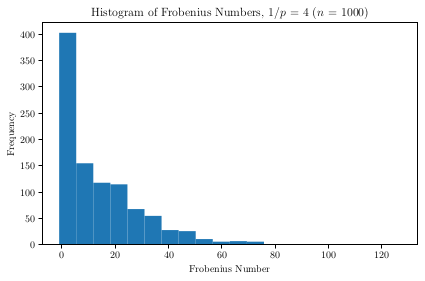

In [139]:
# Make a histogram of the embedding dimension
plt.hist(frobenius_numbers[0], bins = 20)
plt.xlabel('Frobenius Number')
plt.ylabel('Frequency')
plt.title('Histogram of Frobenius Numbers, $1/p$ = 4 ($n$ = 1000)')
plt.savefig('frobenius_hist4.pgf')

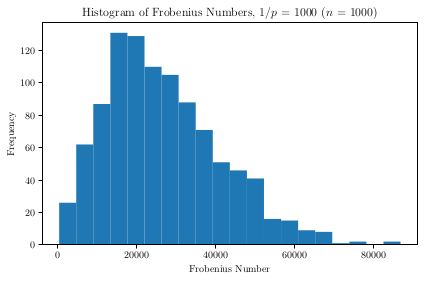

In [138]:
# Make a histogram of the embedding dimension
plt.hist(frobenius_numbers[-1], bins = 20)
plt.xlabel('Frobenius Number')
plt.ylabel('Frequency')
plt.title('Histogram of Frobenius Numbers, $1/p$ = 1000 ($n$ = 1000)')
plt.savefig('frobenius_hist1000.pgf')

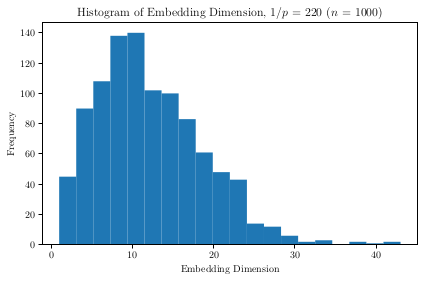

In [142]:
# Do the same with embedding dimension
with open('embedding_dims.pkl', 'rb') as f:
    embedding_dims = pickle.load(f)

# Make a histogram of the embedding dimension
plt.hist(embedding_dims[3], bins = 20)
plt.xlabel('Embedding Dimension')
plt.ylabel('Frequency')
plt.title('Histogram of Embedding Dimension, $1/p$ = 220 ($n$ = 1000)')
plt.savefig('embedding_hist220.pgf')

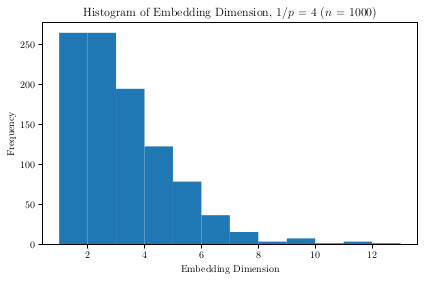

In [145]:
# Make a histogram of the embedding dimension
plt.hist(embedding_dims[0], bins = 12)
plt.xlabel('Embedding Dimension')
plt.ylabel('Frequency')
plt.title('Histogram of Embedding Dimension, $1/p$ = 4 ($n$ = 1000)')
plt.savefig('embedding_hist4.pgf')

In [103]:
1/x

array([   4.        ,   75.14285714,  146.28571429,  217.42857143,
        288.57142857,  359.71428571,  430.85714286,  502.        ,
        573.14285714,  644.28571429,  715.42857143,  786.57142857,
        857.71428571,  928.85714286, 1000.        ])

In [ ]:
n = 30000
sum = 0
p = 0.01
for i in range(n):
    sum += ((1 - p)**(sqrt(i)))*(1 + sqrt(i)*p)
print(sum.n())

20274.0555032142


In [ ]:
print(sum.n())

265.879602864694


In [7]:
# Back semigroups with fixed frobenius number
def random_back_semigroup_ffn(frobenius_number, p):
    generators = list(range(frobenius_number + 1, 2 * frobenius_number + 2))
    semigroup = NumericalSemigroup(generators)
    for i in range(frobenius_number - 1, 0, -1):
        if random.random() < p:
            if NumericalSemigroup(generators + [i]).FrobeniusNumber() == frobenius_number:
                generators.append(i)
                semigroup = NumericalSemigroup(generators)
                generators = semigroup.gens
    return semigroup
                                                              

In [11]:
test = random_back_semigroup_ffn(100, 0.5)
test

Numerical Semigroup generated by [30, 32, 37, 41, 46, 51, 52, 53, 55, 56, 58, 61, 65, 66, 72, 80]

In [14]:
test.AperySet(test.gens[0])

[0,
 61,
 32,
 93,
 64,
 65,
 66,
 37,
 98,
 69,
 130,
 41,
 72,
 73,
 74,
 105,
 46,
 107,
 78,
 109,
 80,
 51,
 52,
 53,
 84,
 55,
 56,
 87,
 58,
 89]

In [15]:
random_back_list = []
for i in range(1000):
    random_back_list.append(random_back_semigroup_ffn(20, 0.5))
plt.hist(embedding_dims(random_back_list), np.arange(0.5, 20.5, 1))

KeyboardInterrupt: Ctrl-c pressed while running Gap

IOStream.flush timed out
IOStream.flush timed out


([<matplotlib.axis.XTick object at 0x7fb8de976b90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

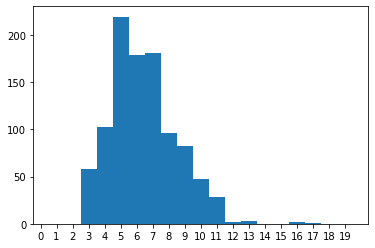

In [ ]:
plt.hist(embedding_dims(random_back_list), np.arange(0.5, 20.5, 1))
# Set x axis ticks as integers
plt.xticks(np.arange(0, 20, 1.0))

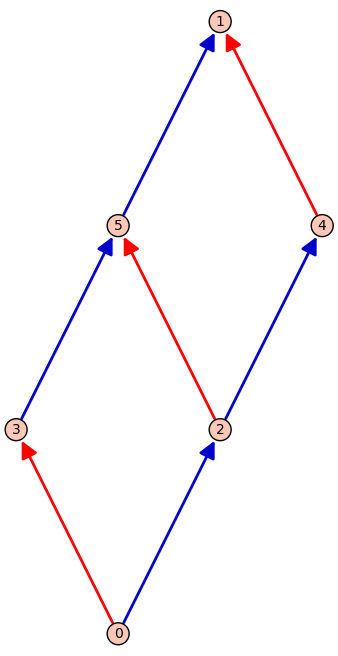

In [ ]:
test = NumericalSemigroup([6,9,20])
PlotKunzPoset(test)

In [ ]:
test.FrobeniusNumber(
)

43

([<matplotlib.axis.XTick object at 0x7fb8d5b54670>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

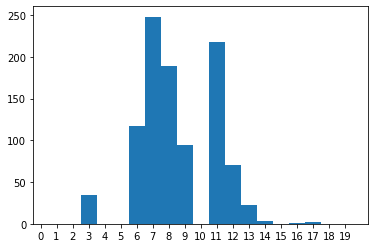

In [ ]:
# multiplicities
plt.hist([min(semigroup.gens) for semigroup in random_back_list], np.arange(0.5, 20.5, 1))
# Set x axis ticks as integers
plt.xticks(np.arange(0, 20, 1.0))

In [ ]:
# n  = 1000
random_back_list = []
for i in range(1000):
    random_back_list.append(random_back_semigroup_ffn(100, 0.5))

KeyboardInterrupt: Ctrl-c pressed while running Gap

IOStream.flush timed out
IOStream.flush timed out


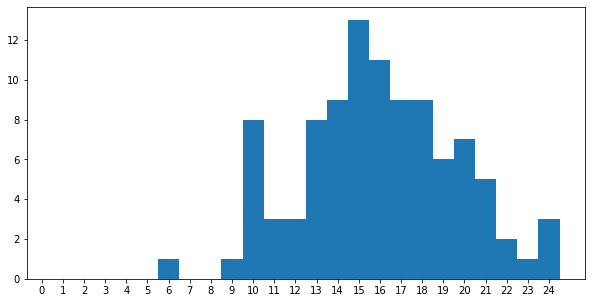

In [ ]:
plt.hist(embedding_dims(random_back_list), np.arange(0.5, 25.5, 1))
plt.xticks(np.arange(0, 25, 1.0))
plt.rcParams["figure.figsize"] = (10,5)

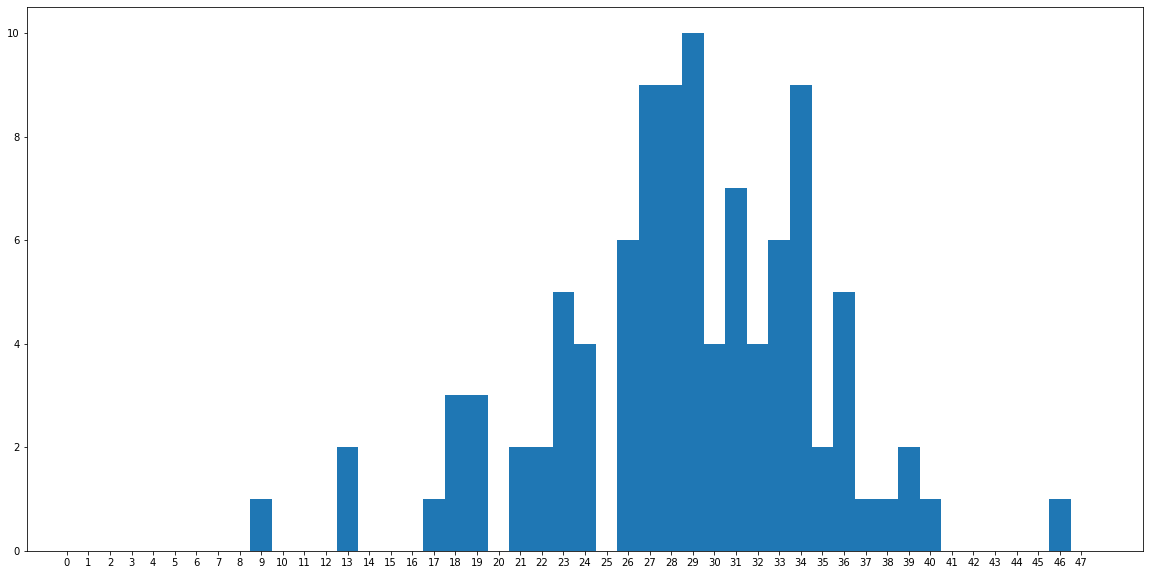

In [ ]:
plt.hist([min(semigroup.gens) for semigroup in random_back_list], np.arange(0.5, 48.5, 1))
plt.xticks(np.arange(0, 48, 1))
# Make the plot bigger
plt.rcParams["figure.figsize"] = (10,5)

In [ ]:
import math
import numpy as np
import random

n = 1000
p = math.sqrt(n) / n

list_of_generators = []

for i in range(n):
    if random.random() < p:
        list_of_generators.append(i)


# Check if all the sums of 3 elements of the list generate all the numbers between 0 and 99
generated = np.zeros(n)

for a in list_of_generators:
    for b in list_of_generators:
        for c in list_of_generators:
            generated[(a + b + c) % n] = 1
            
print(sum(generated))

1000.0


In [ ]:
import math
import numpy as np
import random

n = 10000
p = math.sqrt(n) / n

list_of_generators = []

for i in range(n):
    if random.random() < p:
        list_of_generators.append(i)


# Check if all the sums of 3 elements of the list generate all the numbers between 0 and 99
generated = np.zeros(n)

for a in list_of_generators:
    for b in list_of_generators:
        for c in list_of_generators:
            generated[(a + b + c) % n] = 1
            
print(sum(generated))

10000.0
